In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
sex = pd.read_csv(r"C:\Users\anato\Documents\IRONHACK\IronFrandre\Courses\Use_case_data.xlsx - Sheet1.csv")
sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User_ID                              89 non-null     float64
 1   Gender                               89 non-null     object 
 2   Age                                  89 non-null     float64
 3   Location                             89 non-null     object 
 4   Verification                         89 non-null     object 
 5   Sexual_orientation                   89 non-null     object 
 6   Sexual_polarity                      89 non-null     object 
 7   Looking_for                          88 non-null     object 
 8   Points_Rank                          89 non-null     object 
 9   Member_since                         89 non-null     int64  
 10  Number_of_Comments_in_public_forum   89 non-null     int64  
 11  Number_of_advertisments_posted    

In [6]:
sex['Gender'] = sex['Gender'].apply(lambda x : 1 if x == 'male' else 0)

In [8]:
sex.loc[sex['Looking_for'].isna(), 'Looking_for'] = 'Women'

In [9]:
sex['Risk'].value_counts()

No_risk      57
High_risk    32
Name: Risk, dtype: int64

In [10]:
sex['Risk'] = sex['Risk'].apply(lambda x : 0 if x == 'No_risk' else 1)

In [11]:
sex['Verification'] = sex['Verification'].apply(lambda x : 1 if x == 'Verified' else 0)

In [15]:
def orientation_code(o) :
    if o == 'Heterosexual' :
        return 0
    elif o == 'bicurious' :
        return 1
    elif o == 'bisexual' :
        return 2
    else :
        return 3


sex['Sexual_orientation'] = sex['Sexual_orientation'].apply(orientation_code)

In [17]:
def polarity_code(p) :
    if p == 'Dominant' :
        return 2
    elif p == 'Switch' :
        return 1
    else :
        return 0

sex['Sexual_polarity'] = sex['Sexual_polarity'].apply(polarity_code)

In [18]:
sex['Looking_for'].value_counts()

Women               41
Nobody_but_maybe    20
Nobody              20
Men_and_Women        5
Men                  3
Name: Looking_for, dtype: int64

In [19]:
def lf_code(p) :
    if p == 'Nobody' :
        return 0
    elif p == 'Nobody_but_maybe' :
        return 1
    elif p == 'Men' :
        return 2
    elif p == 'Men_and_Women' :
        return 3
    else :
        return 4

sex['Looking_for'] = sex['Looking_for'].apply(lf_code)

In [29]:
sex['Points_Rank'].unique()

array([  50,  518,  150,  114,  497,  127,   18,   38,  -26,   15,   36,
         30,  313,    0,  155,  236,   60,   29,  564,  296,   66,  404,
         20,  195,   56,  226,   90,   78,   32,   58,   83,  124,   10,
         93,   19,    3,   51,  451,  268,  429,    5,   25,   12,   28,
        512,  184,  307,  471,   48,   55,  318,   68,   62,   52, 1626],
      dtype=int64)

In [26]:
sex.loc[sex['Points_Rank'] == '1 626', 'Points_Rank'] = 1626

In [27]:
sex['Points_Rank'] = sex['Points_Rank'].apply(int)

In [ ]:
X = sex[['Gender', 'Age', 'Verification', 'Sexual_orientation', 'Sexual_polarity', 'Looking_for', 'Points_Rank', 'Member_since', 'Number_of_Comments_in_public_forum', 'Number_of_advertisments_posted', 'Number_of_offline_meetings_attended', 'Profile_pictures']]
y = sex['Risk']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

c:\Users\anato\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\anato\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

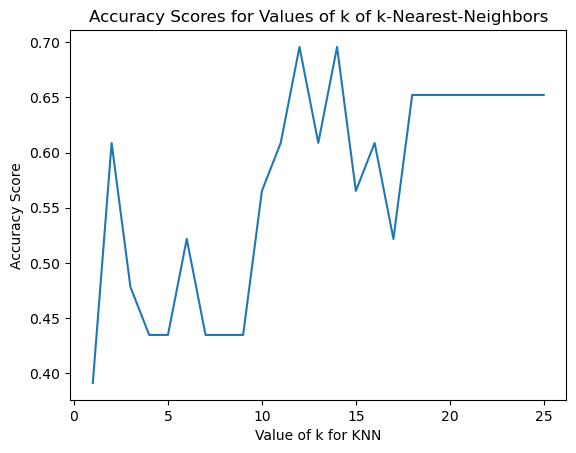

In [52]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [57]:
tree = DecisionTreeClassifier(max_depth = 8, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.739


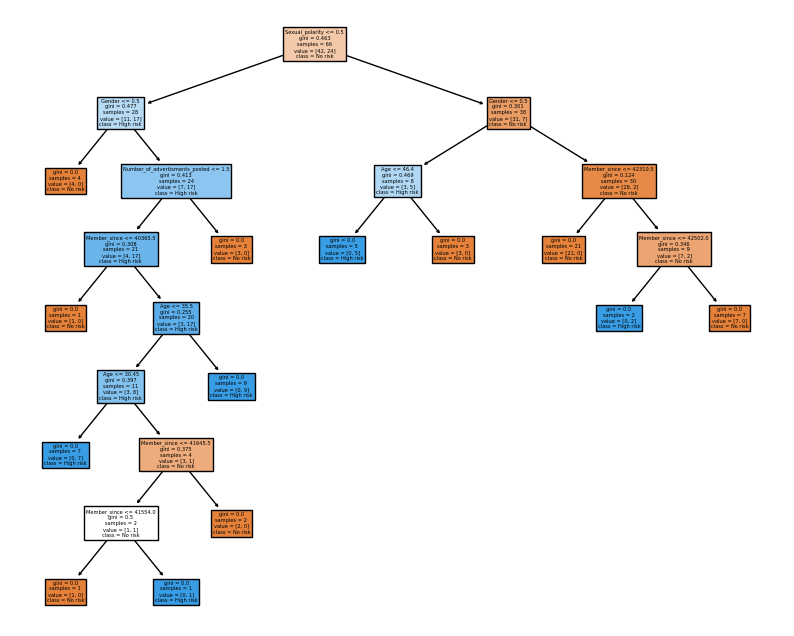

In [58]:
plt.figure(figsize = (10,8))
plot_tree(tree, feature_names = ['Gender', 'Age', 'Verification', 'Sexual_orientation', 'Sexual_polarity', 'Looking_for', 'Points_Rank', 'Member_since', 'Number_of_Comments_in_public_forum', 'Number_of_advertisments_posted', 'Number_of_offline_meetings_attended', 'Profile_pictures'], class_names = ['No risk', 'High risk'], filled = True);